In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorboard
import datetime

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_label), (test_images, test_label) = fashion_mnist.load_data()

In [3]:
print('Training data', train_images.shape, train_label.shape)
print('Testing data', test_images.shape, test_label.shape)

Training data (60000, 28, 28) (60000,)
Testing data (10000, 28, 28) (10000,)


In [4]:
def plot_train_image(index:int):
    plt.figure()
    plt.title('Label: '+ str(train_label[index]))
    plt.imshow(train_images[index], cmap='gray')
    plt.colorbar()
    plt.show()

def plot_test_image(index:int):
    plt.figure()
    plt.title('Label: '+ str(test_label[index]))
    plt.imshow(test_images[index], cmap='gray')
    plt.colorbar()
    plt.show()

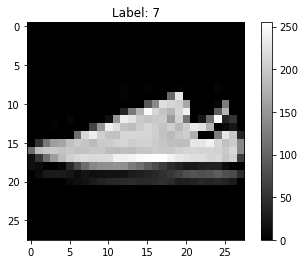

In [5]:
plot_train_image(6)

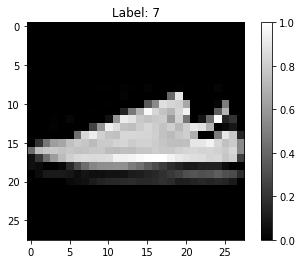

In [6]:
train_images = train_images/255.0
test_images = test_images/255.0

plot_train_image(6)

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28), name="flatten"))
model.add(tf.keras.layers.Dense(128, activation='relu', name='dense-128-relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax', name='dense-10-softmax'))

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense-128-relu (Dense)       (None, 128)               100480    
_________________________________________________________________
dense-10-softmax (Dense)     (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
log_dir = './logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq=1)
train_hist = model.fit(x=train_images, y=train_label, epochs=40, verbose=1, validation_data=(test_images, test_label), callbacks=[tensorboard_callback])

Epoch 1/40
   1/1875 [..............................] - ETA: 0s - loss: 2.3517 - accuracy: 0.0938WARNING:tensorflow:From C:\Users\91789\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5008 - accuracy: 0.8231 - val_loss: 0.4324 - val_accuracy: 0.8487
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3732 - accuracy: 0.8660 - val_loss: 0.3881 - val_accuracy: 0.8632
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3403 - accuracy: 0.8763 - val_loss: 0.3692 - val_accuracy: 0.8676
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3128 - accuracy: 0.8856 - val_loss: 0.3674 - val_accuracy: 0.8683
Epoch 5/40
1875/1875 [==============================] - 

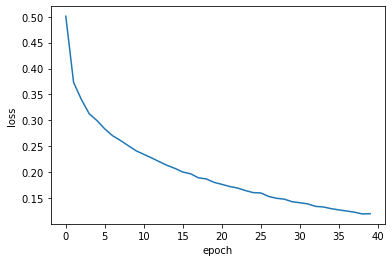

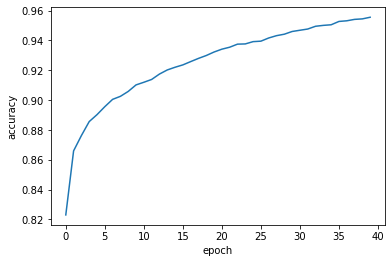

In [11]:
plt.figure()
plt.plot(train_hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.figure()
plt.plot(train_hist.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [12]:
test_loss, test_accuracy = model.evaluate(x=test_images, y=test_label, verbose=0)
print(test_loss, test_accuracy)

0.4442092776298523 0.8845000267028809
